<a href="https://colab.research.google.com/github/DhirajBembade/Capstone-Projects/blob/main/1-%5B%20China's%20Debt%20Trap%20Analysis%20%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Necessary libraries- 📥** 

In [1]:
# Data processing, Linear algebra
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import plotly.offline as pyo
import plotly.express as px
import textwrap

import warnings
warnings.filterwarnings("ignore")

#**Mounting our dataset 🪜-**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/china_dept_trap.csv") 

#**Basic Information about our Dataset📝-**

In [3]:
df.head(10)

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,$47M,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,$475M,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,$600M,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya
5,20 Magnetic Resonance Imaging Equipment Purchase,2015,$27M,CDB,Government,Government,None Known,Kenya
6,2015 Loop network in southwest regions,2015,$90M,ExImBank,Government,Power,None Known,Cambodia
7,2017 Loop network in southwest regions and the...,2017,$180M,ExImBank,Government,Power,None Known,Cambodia
8,220kV Substation (Kinsuka and Associated Distr...,2018,$299M,ExImBank,Government,Power,None Known,"Congo, Democratic Republic of the"
9,230 KV Thavieng S/S-Laksao S/S and 115 KV Nam ...,2018,$199M,ExImBank,Government,Power,Within Indigenous Peoples' Lands\n Within Crit...,Laos


In [4]:
df.tail()

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
853,Zalingei-El Geneinah Road Construction,2009,$120M,ExImBank,Government,Transport,None Known,Sudan
854,Zanzibar Airport Terminal 2 Expansion,2010,$73M,ExImBank,Government,Transport,None Known,Tanzania
855,Zemun-Borca bridge,2009,$217M,ExImBank,Government,Transport,None Known,Serbia
856,Zongo II Hydropower Station,2011,$367M,ExImBank,Government,Power,None Known,"Congo, Democratic Republic of the"
857,Zungeru Hydropower Plant Project,2013,$984M,ExImBank,Government,Power,Within Indigenous Peoples' Lands,Nigeria


In [5]:
# No of rows and columns in DataFrame
print('Number of rows: {} \nNumber of columns: {}'.format(df.shape[0],df.shape[1]))

Number of rows: 858 
Number of columns: 8


In [6]:
#df.shape
#print(" Shape of the DataFrame is: " , df.shape)

In [7]:
df.columns

Index(['Expand All | Collapse All', 'YEAR', 'AMOUNT', 'LENDER', 'BORROWER',
       'SECTOR', 'SENSITIVE TERRITORY OVERLAP', 'Country'],
      dtype='object')

In [8]:
df= df.rename(columns = {'Expand All | Collapse All' : 'TITLE'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   TITLE                        858 non-null    object
 1   YEAR                         858 non-null    int64 
 2   AMOUNT                       858 non-null    object
 3   LENDER                       858 non-null    object
 4   BORROWER                     857 non-null    object
 5   SECTOR                       858 non-null    object
 6   SENSITIVE TERRITORY OVERLAP  858 non-null    object
 7   Country                      858 non-null    object
dtypes: int64(1), object(7)
memory usage: 53.8+ KB


In [10]:
# Checking duplicated values
df.duplicated().sum()

0

#**Null Values🔍-**

In [11]:
df.isnull().sum()

TITLE                          0
YEAR                           0
AMOUNT                         0
LENDER                         0
BORROWER                       1
SECTOR                         0
SENSITIVE TERRITORY OVERLAP    0
Country                        0
dtype: int64

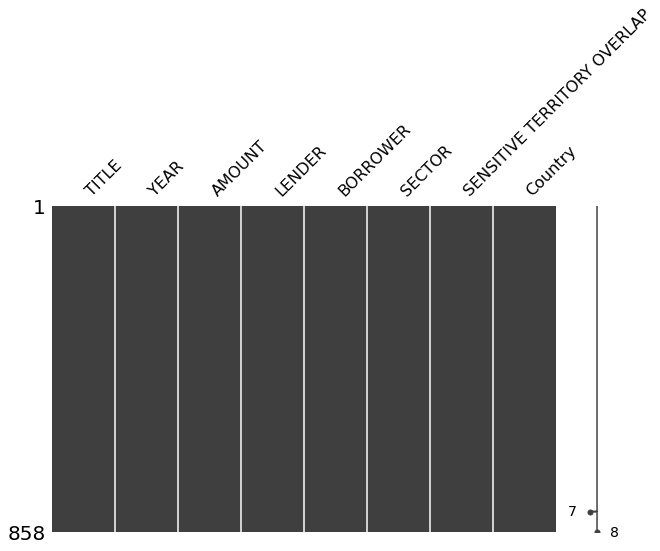

In [12]:
msno.matrix(df, figsize=(10,6))
plt.show()

👉 As we Can see we have a missing value in Borrower Column. we have 858 entries here.

In [13]:
# Dropping null values
df.dropna(inplace = True)

In [14]:
# Rechecking for null values again
df.shape

(857, 8)

#**Statistical information📈 -**

In [15]:
df.describe(include = "all")

,TITLE,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
count,857,857.000000,857,857,857,857,857,857
unique,827,NaN,346,7,120,10,8,94
top,Discretionary,NaN,$50M,ExImBank,Government,Transport,None Known,Angola
freq,8,NaN,18,625,677,316,524,115
mean,NaN,2013.273046,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.892164,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.describe()

,YEAR
count,857.000000
mean,2013.273046
std,2.892164
min,2008.000000
25%,2011.000000
50%,2013.000000
75%,2016.000000
max,2019.000000


In [17]:
df.describe(include = ['O']).T

,count,unique,top,freq
TITLE,857,827,Discretionary,8
AMOUNT,857,346,$50M,18
LENDER,857,7,ExImBank,625
BORROWER,857,120,Government,677
SECTOR,857,10,Transport,316
SENSITIVE TERRITORY OVERLAP,857,8,None Known,524
Country,857,94,Angola,115


In [18]:
df.nunique()

TITLE                          827
YEAR                            12
AMOUNT                         346
LENDER                           7
BORROWER                       120
SECTOR                          10
SENSITIVE TERRITORY OVERLAP      8
Country                         94
dtype: int64

#**EDA & Visualization🔥-**

In [19]:
df['YEAR'].unique()

array([2011, 2009, 2012, 2016, 2015, 2017, 2018, 2014, 2008, 2010, 2013,
       2019])

In [20]:
df['YEAR'].value_counts()

2016    133
2011    106
2013     91
2012     86
2015     79
2017     75
2014     70
2009     69
2010     58
2018     45
2008     40
2019      5
Name: YEAR, dtype: int64

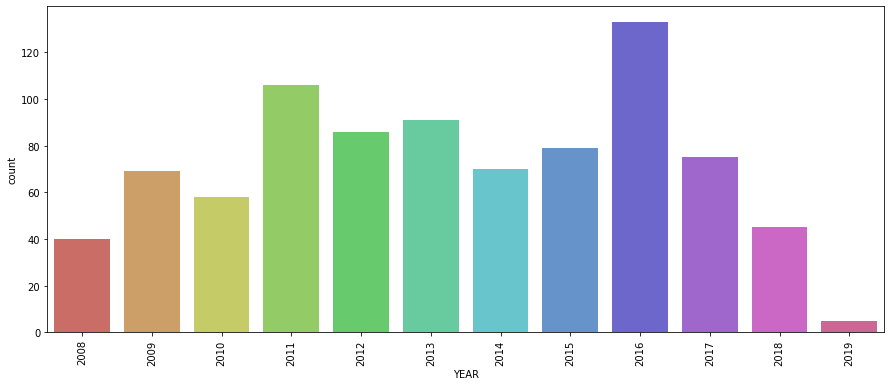

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(data = df , x = 'YEAR', palette ='hls')
plt.xticks(rotation = 90)
plt.show()

In [22]:
fig1 = px.histogram(df, x = 'YEAR', color = 'YEAR')
fig1.show()

In [23]:
df['LENDER'].unique()

array(['CDB', 'ExImBank', 'CDB, ExImBank', 'BOC, CDB, ExImBank',
       'CDB, ICBC', 'CDB, others', 'CDB, Citic'], dtype=object)

In [24]:
df['LENDER'].value_counts()

ExImBank              625
CDB                   219
CDB, ExImBank           8
CDB, ICBC               2
BOC, CDB, ExImBank      1
CDB, others             1
CDB, Citic              1
Name: LENDER, dtype: int64

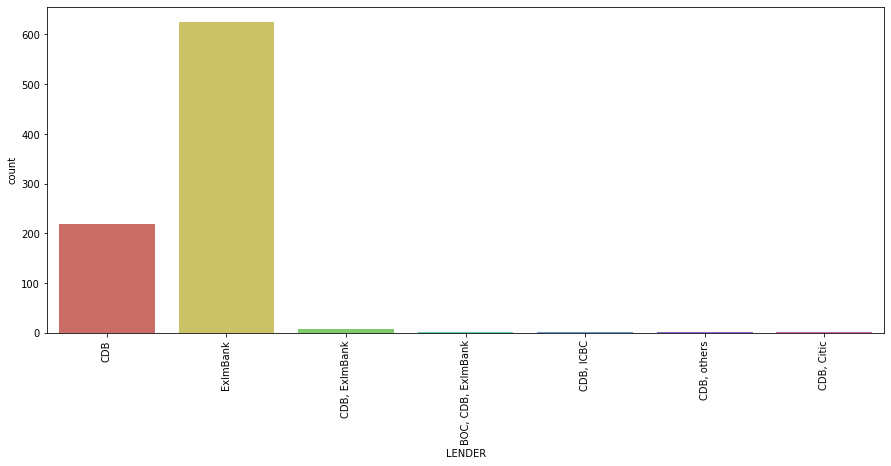

In [25]:
plt.figure(figsize=(15,6))
sns.countplot( x='LENDER', data = df , palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [26]:
fig2 = px.histogram(df , x = 'LENDER', color = 'LENDER')
fig2.show()

👉 Exim Bank is top bank as a Lender after that CDB

In [27]:
df['SECTOR'].unique()

array(['Transport', 'Extraction, pipelines', 'Government', 'Power',
       'Mulit-sector/discretionary', 'Telecom', 'Other construction',
       'Agriculture, food', 'Manufacturing', 'fTransport'], dtype=object)

In [28]:
df['SECTOR'].value_counts()

Transport                     316
Power                         203
Government                    138
Telecom                        63
Extraction, pipelines          38
Mulit-sector/discretionary     30
Other construction             29
Agriculture, food              27
Manufacturing                  12
fTransport                      1
Name: SECTOR, dtype: int64

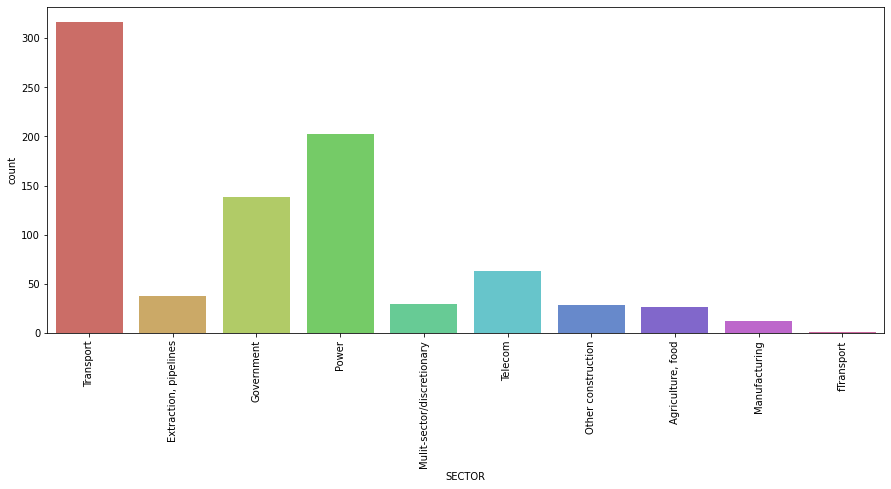

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(x='SECTOR', data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [30]:
fig3 = px.histogram(df, x = 'SECTOR', color = 'SECTOR')
fig3.show()

👉 We have 10 sector in our dataset and Transport sector has max count / investment.

In [31]:
df['SENSITIVE TERRITORY OVERLAP'].unique()

array(['None Known',
       "Within Indigenous Peoples' Lands\n Within Critical Habitats",
       "Within Indigenous Peoples' Lands",
       "Within Indigenous Peoples' Lands\n Within National Protected Areas",
       'Within Critical Habitats\n Within National Protected Areas',
       'Within Critical Habitats',
       "Within Indigenous Peoples' Lands\n Within Critical Habitats\n Within National Protected Areas",
       'Within National Protected Areas'], dtype=object)

In [32]:
df['SENSITIVE TERRITORY OVERLAP'].value_counts()

None Known                                                                                       524
Within Critical Habitats                                                                         124
Within Critical Habitats\n Within National Protected Areas                                        57
Within Indigenous Peoples' Lands\n Within Critical Habitats                                       45
Within Indigenous Peoples' Lands                                                                  41
Within Indigenous Peoples' Lands\n Within Critical Habitats\n Within National Protected Areas     34
Within National Protected Areas                                                                   19
Within Indigenous Peoples' Lands\n Within National Protected Areas                                13
Name: SENSITIVE TERRITORY OVERLAP, dtype: int64

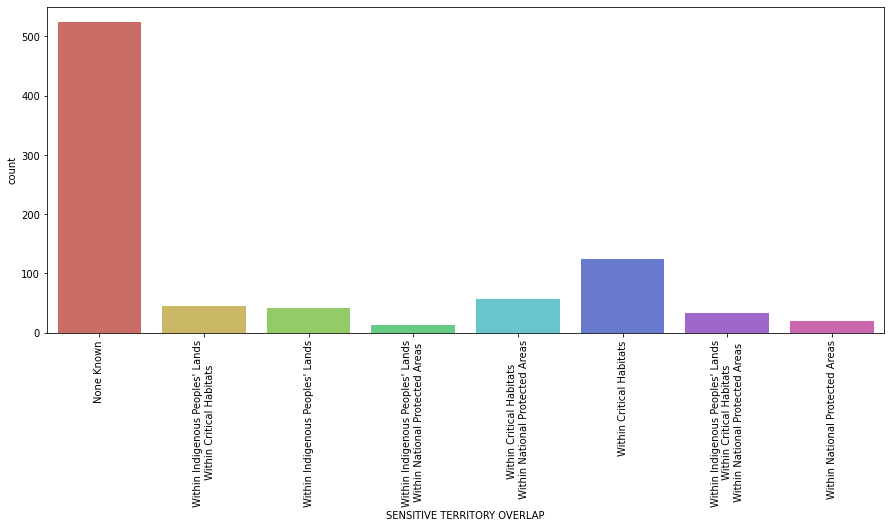

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(x='SENSITIVE TERRITORY OVERLAP', data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [34]:
df['Country'].unique()

array(['Angola', 'Brazil', 'Suriname', 'Cambodia', 'Kenya',
       'Congo, Democratic Republic of the', 'Laos', 'Bangladesh',
       'Nigeria', 'Benin', 'Zambia', 'Bahamas', "Cote d'Ivoire",
       'Ethiopia', 'Djibouti', 'Indonesia', 'Togo', 'Philippines',
       'Myanmar', 'Mozambique', 'Eritrea', 'Ukraine', 'South Sudan',
       'Sudan', 'Kyrgyz Republic', 'Uzbekistan', 'Ecuador', 'Mauritania',
       'Kazakhstan', 'Jordan', 'Niger', 'Mauritius', 'Pakistan', 'Mali',
       'Hungary', 'Serbia', 'Belarus', 'Morocco', 'Regional', 'Malawi',
       'Egypt', 'Tanzania', 'Congo, Republic of the', 'Fiji', 'Nepal',
       'Rwanda', 'Ghana', 'Senegal', 'Sri Lanka', 'Argentina', 'Guyana',
       'Trinidad and Tobago', 'Maldives', 'Bolivia', 'Vietnam', 'Gabon',
       'Montenegro', 'Papua New Guinea', 'Samoa', 'Iran', 'Cameroon',
       'Venezuela', 'Timor-Leste', 'Peru', 'Tajikistan', 'Malaysia',
       'Dominican Republic', 'Uganda', 'Russian Federation', 'Madagascar',
       'Turkmenistan', 

In [35]:
df['Country'].value_counts()

Angola                  115
Ethiopia                 34
Cambodia                 31
Sri Lanka                30
Indonesia                30
                       ... 
Malaysia                  1
Peru                      1
Hungary                   1
Jordan                    1
Bosnia & Herzegovina      1
Name: Country, Length: 94, dtype: int64

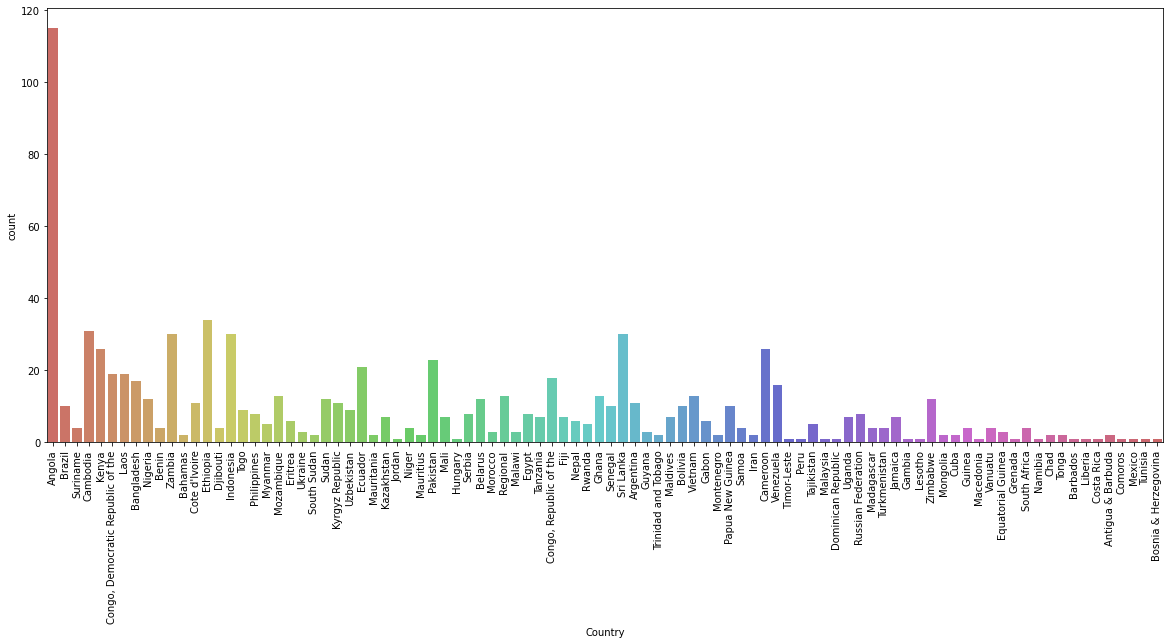

In [36]:
plt.figure(figsize=(20,8))
sns.countplot(x='Country', data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [37]:
def amount(a):
    y=a
    if ',' in a:
      a=a.replace(',','')
    a=float(a[1:-1])
    if y[-1]=='M':
      return a*1000000
    elif y[-1]=='B':
      return a*1000000000
    else:
      return 'Please check'

In [38]:
df['AMOUNT']=df['AMOUNT'].apply(amount)

In [39]:
df.head(10)

,TITLE,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,5.000000e+07,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,7.000000e+09,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,4.700000e+07,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,4.750000e+08,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,6.000000e+08,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya
5,20 Magnetic Resonance Imaging Equipment Purchase,2015,2.700000e+07,CDB,Government,Government,None Known,Kenya
6,2015 Loop network in southwest regions,2015,9.000000e+07,ExImBank,Government,Power,None Known,Cambodia
7,2017 Loop network in southwest regions and the...,2017,1.800000e+08,ExImBank,Government,Power,None Known,Cambodia
8,220kV Substation (Kinsuka and Associated Distr...,2018,2.990000e+08,ExImBank,Government,Power,None Known,"Congo, Democratic Republic of the"
9,230 KV Thavieng S/S-Laksao S/S and 115 KV Nam ...,2018,1.990000e+08,ExImBank,Government,Power,Within Indigenous Peoples' Lands\n Within Crit...,Laos


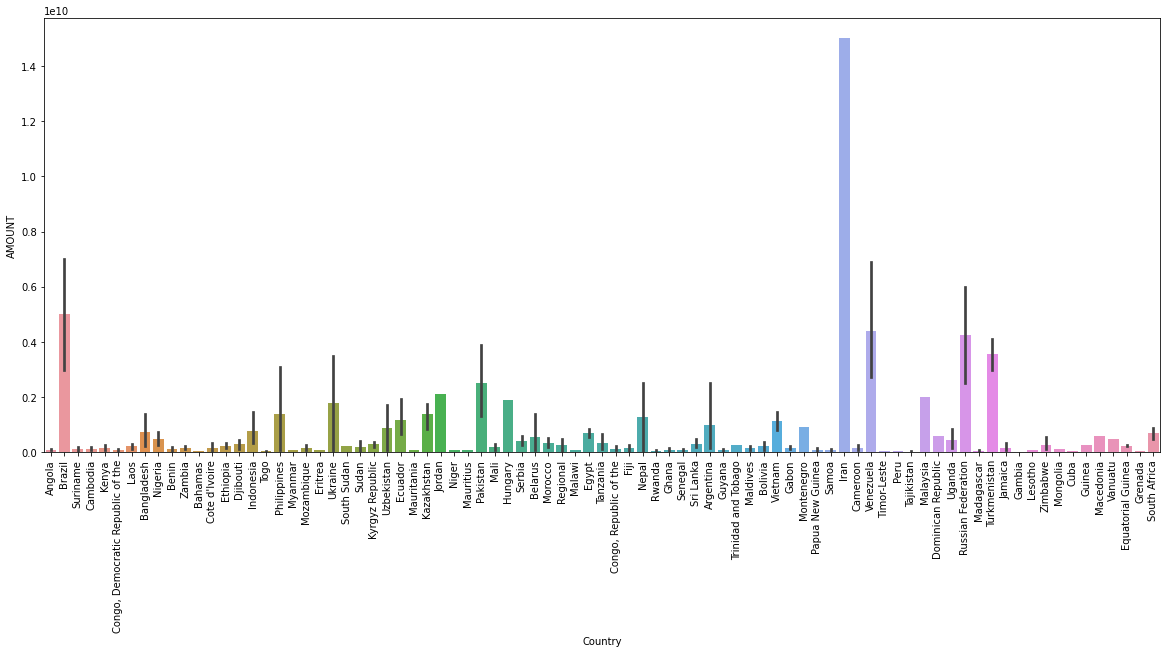

In [40]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'Country',y = 'AMOUNT', data = df.head(500))
plt.xticks(rotation = 90)
plt.show()

In [41]:
fig4 = px.bar(df.head(500), x = "Country", y = "AMOUNT")
fig4.show()

In [42]:
fig4 = px.bar(df.tail(500),x = "Country", y = "AMOUNT")
fig4.show()

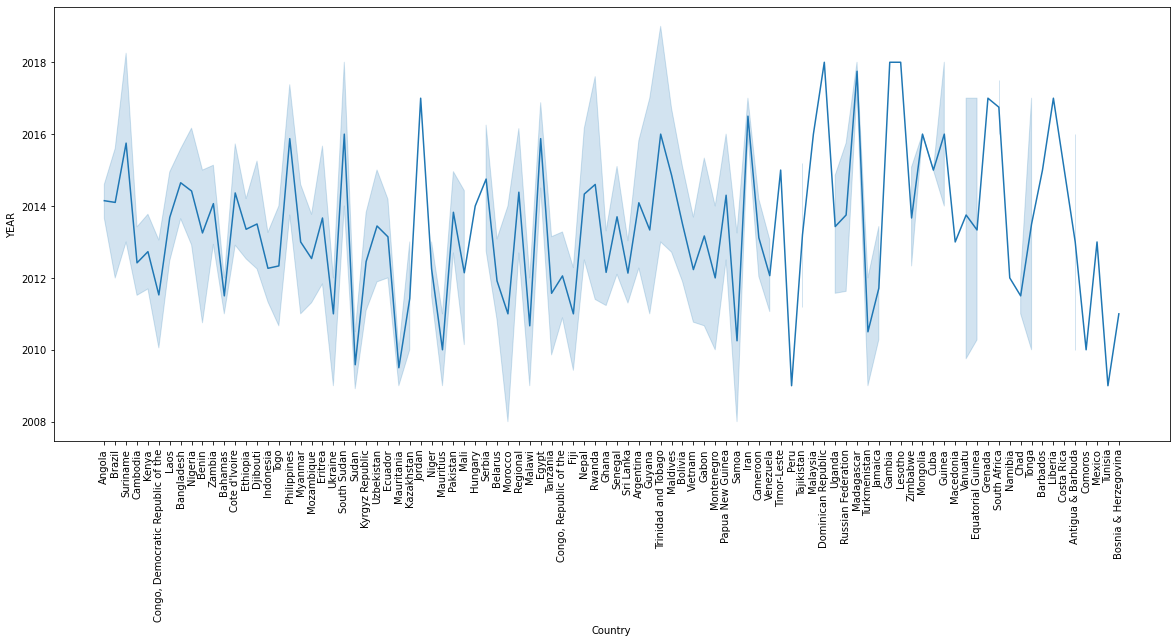

In [43]:
plt.figure(figsize=(20,8))
sns.lineplot(x = 'Country',y = 'YEAR', data = df)
plt.xticks(rotation = 90)
plt.show()

In [44]:
fig6 = px.histogram(df,x = "Country", color = "SECTOR")
fig6.show()

,YEAR,AMOUNT
0,2008,7.565000e+09
1,2009,6.240000e+10
2,2010,4.123500e+10
3,2011,3.394900e+10
4,2012,3.488600e+10
5,2013,4.185200e+10
6,2014,4.839100e+10
7,2015,5.110400e+10
8,2016,7.500100e+10
9,2017,4.924100e+10


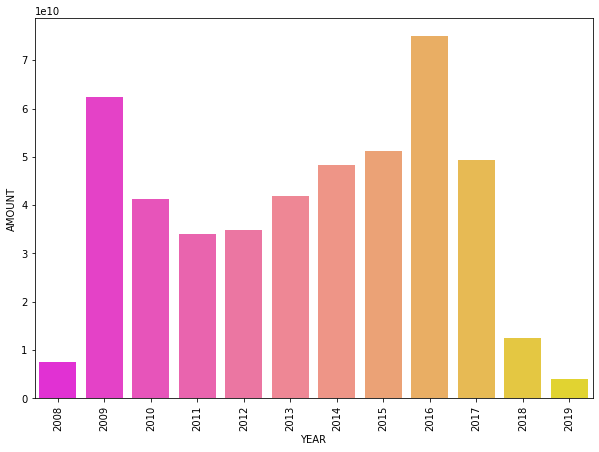

In [45]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
data=df.groupby('YEAR').sum().reset_index().sort_values('YEAR').sort_values('YEAR')
display(data)

sns.barplot(data=data,x='YEAR',y='AMOUNT',palette='spring')
plt.show()

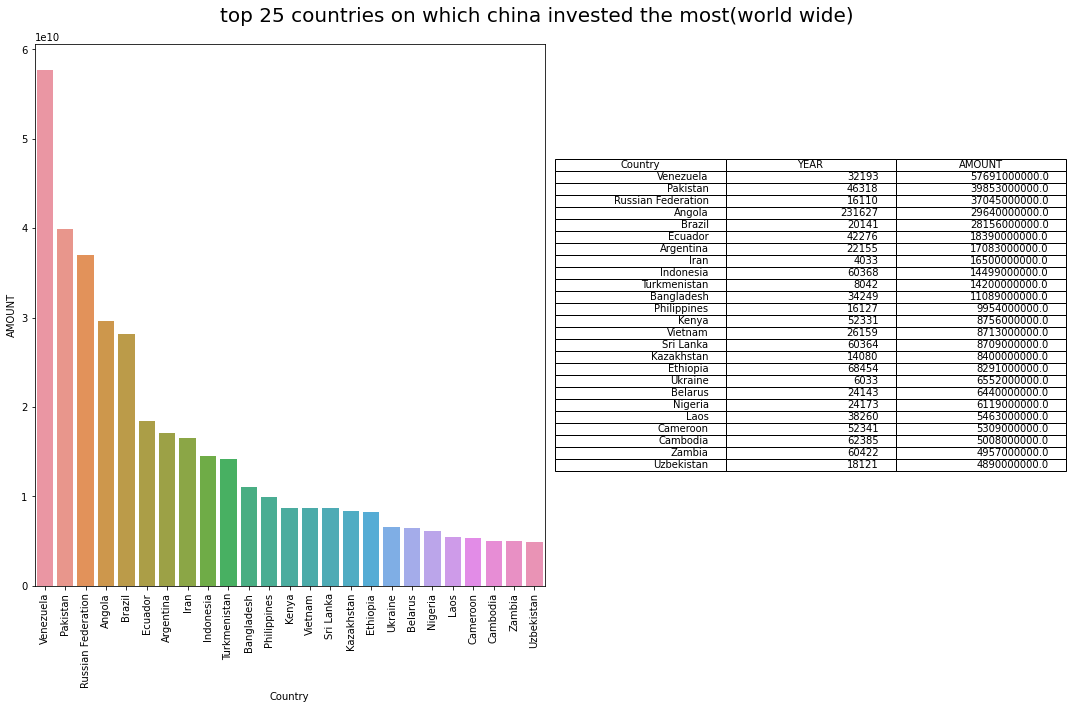

In [46]:
plt.figure(figsize=(15,10))
plt.suptitle('top 25 countries on which china invested the most(world wide)',size=20,weight=10)
data=df.groupby('Country').sum().reset_index().sort_values('AMOUNT',ascending=False)
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.barplot(data=data.head(25),x='Country',y='AMOUNT')
plt.subplot(1,2,2)
plt.axis('off')
plt.tight_layout()
plt.table(cellText=data.head(25).values, colLabels=data.columns, loc='center')

👉 China have invested max/most amount at Venezuela country after that pakistan country as per our dataset

,YEAR,AMOUNT
0,2010,1.430000e+10
1,2010,6.000000e+09
2,2013,5.000000e+09
3,2015,5.000000e+09
4,2012,4.000000e+09
5,2014,4.000000e+09
6,2013,4.000000e+09
7,2009,4.000000e+09
8,2011,4.000000e+09
9,2016,2.200000e+09


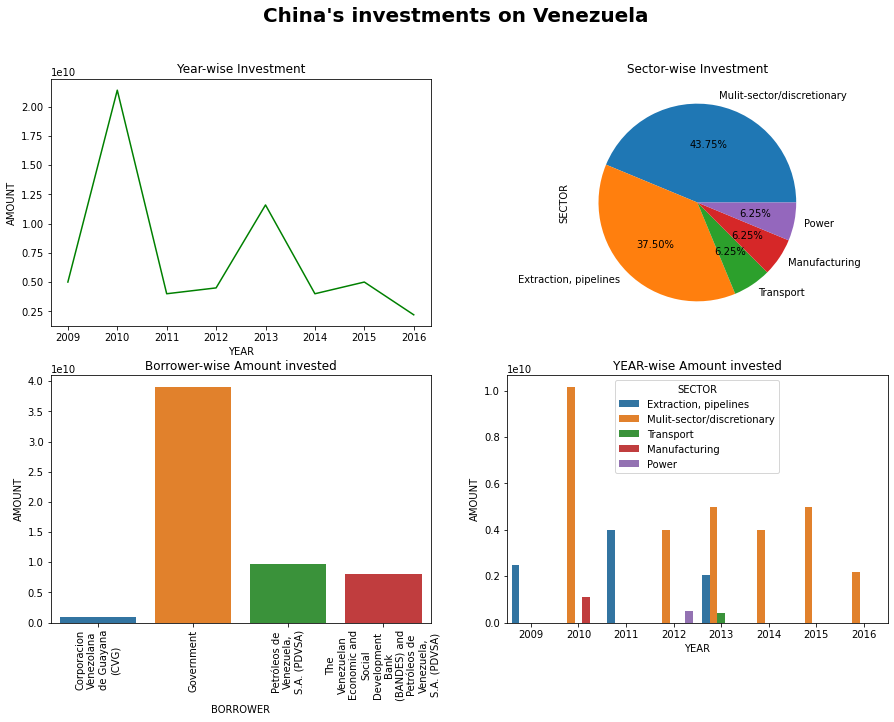

In [47]:
country='Venezuela'
data=df[df['Country']==country]
ax=plt.figure(figsize=(15,10))
plt.suptitle(f"China's investments on {country}",weight='bold',size=20)
plt.subplot(2,2,1)
plt.title('Year-wise Investment')
sns.lineplot(data=data.groupby('YEAR').sum().reset_index(),x='YEAR',y='AMOUNT',color='green')
plt.subplot(2,2,2)
plt.title('Sector-wise Investment')
data['SECTOR'].value_counts().plot.pie(autopct='%.2f%%')
plt.subplot(2,2,3)
plt.title('Borrower-wise Amount invested')
plt.xticks(rotation=90)
ax=sns.barplot(data=data.groupby('BORROWER').sum().reset_index(),x='BORROWER',y='AMOUNT')
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.subplot(2,2,4)
plt.title('YEAR-wise Amount invested')
ax=sns.barplot(data=data,x='YEAR',y='AMOUNT',hue='SECTOR',ci=False)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
display(data.sort_values('AMOUNT',ascending=False)[['YEAR','AMOUNT']].reset_index(drop=True))

👉 As per year-wise investment china's has invested maximum amount in Venezuela country on 2010

👉 China's has invested maximum amount in Venezuela Multi-sector/discretionary sector

,YEAR,AMOUNT
0,2009,6.900000e+09
1,2014,6.500000e+09
2,2017,6.100000e+09
3,2016,2.900000e+09
4,2015,2.700000e+09
5,2015,2.700000e+09
6,2014,1.900000e+09
7,2014,1.600000e+09
8,2017,1.500000e+09
9,2017,1.200000e+09


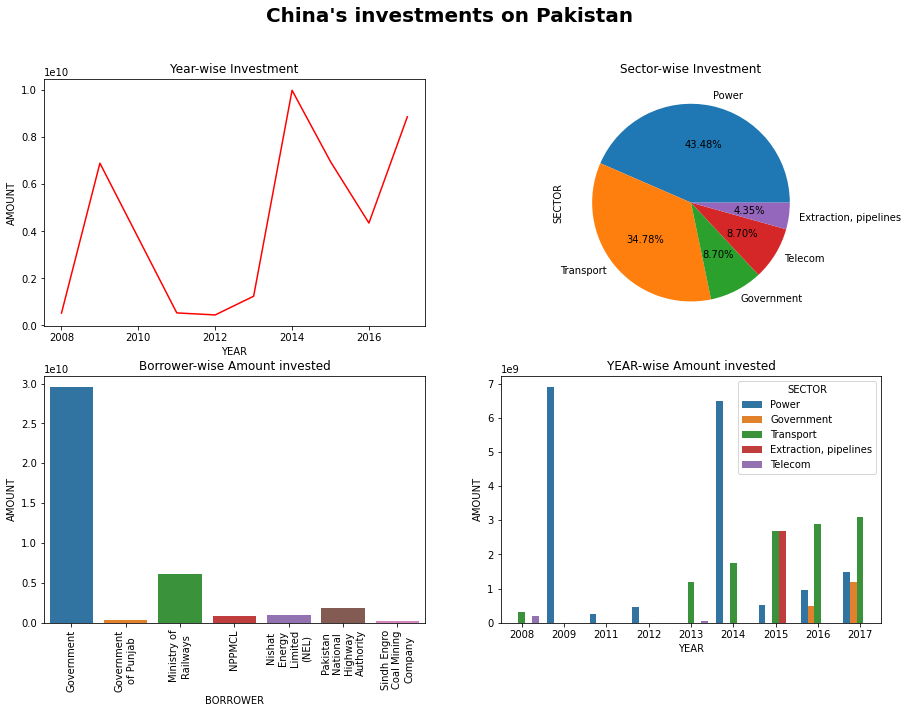

In [48]:
country='Pakistan'
data=df[df['Country']==country]
ax=plt.figure(figsize=(15,10))
plt.suptitle(f"China's investments on {country}",weight='bold',size=20)
plt.subplot(2,2,1)
plt.title('Year-wise Investment')
sns.lineplot(data=data.groupby('YEAR').sum().reset_index(),x='YEAR',y='AMOUNT',color='red')
plt.subplot(2,2,2)
plt.title('Sector-wise Investment')
data['SECTOR'].value_counts().plot.pie(autopct='%.2f%%')
plt.subplot(2,2,3)
plt.title('Borrower-wise Amount invested')
plt.xticks(rotation=90)
ax=sns.barplot(data=data.groupby('BORROWER').sum().reset_index(),x='BORROWER',y='AMOUNT')
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.subplot(2,2,4)
plt.title('YEAR-wise Amount invested')
ax=sns.barplot(data=data,x='YEAR',y='AMOUNT',hue='SECTOR',ci=False)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
display(data.sort_values('AMOUNT',ascending=False)[['YEAR','AMOUNT']].reset_index(drop=True))

👉 as per year-wise investment China's investment in Pakistan got increased in year 2008 & 2014

👉 China has invested max amount in year 2008 & 2014 in power sector.

👉 Chian has maximum investment in pak in power sector and after that in Transport sector.

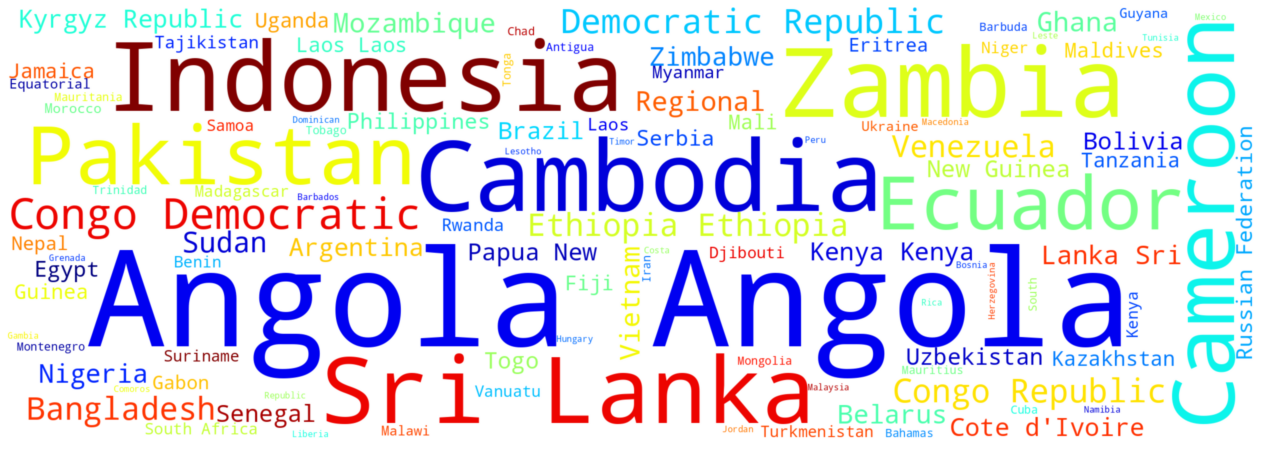

In [49]:


from dataclasses import field
from wordcloud import WordCloud, STOPWORDS

text = " ".join(field for field in df["Country"])
#font = "Quicksand-Bold.ttf"
word_cloud = WordCloud(width = 2300,
                       height = 800,
                       colormap = "jet",
                       background_color = "White").generate(text)
plt.figure(figsize = (50, 8))
plt.imshow(word_cloud,interpolation = "gaussian")
plt.axis("off")
plt.show()

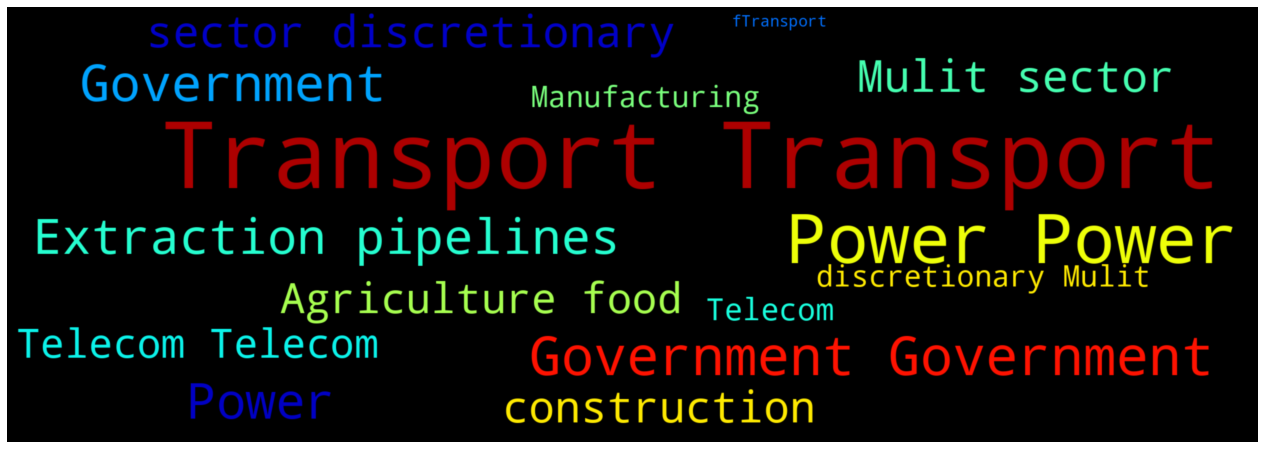

In [50]:


from dataclasses import field
from wordcloud import WordCloud, STOPWORDS

text = " ".join(field for field in df["SECTOR"])
#font = "Quicksand-Bold.ttf"
word_cloud = WordCloud(width = 2300,
                       height = 800,
                       colormap = "jet",
                       background_color = "Black").generate(text)
plt.figure(figsize = (50, 8))
plt.imshow(word_cloud,interpolation = "gaussian")
plt.axis("off")
plt.show()